# 8 Steps Of Machine Learning
* Data Gathering
* Data pre-processing
* Feature Engineering
* Choosing Model
* Training Model
* Test Model/ Model Evaluation
* Parameter Tuning
* Prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
import random
random.seed(41)

In [35]:
# Data Gathering
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn import model_selection
import seaborn as sns
df = pd.read_csv("FuelConsumption.csv")
df.head()
df.describe()

#data Pre-Processing
df.info()
data = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY",
           "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
data.info()

## Feature Engineering Analyssis
corr = data.corr()
# sns.heatmap(corr)
# sns.pairplot(data)
data = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY",
           "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]

## Split data into training and test set
X = data[["ENGINESIZE","FUELCONSUMPTION_COMB"]]
Y = data[["CO2EMISSIONS"]]
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    X, Y, test_size=0.2, random_state=41)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB
<cla

In [36]:
### Modeling
from sklearn import ensemble

## Initialize
rf = ensemble.RandomForestRegressor()

## 
rf.fit(xtrain, ytrain.values.ravel())

## Test Prediction
ypred = rf.predict(xtest)
ypred, ytest
## Evaluation
print("MSE: ", mean_squared_error(ypred, ytest))
print("R2 Score: ", r2_score(ypred, ytest))

MSE:  174.34487896638908
R2 Score:  0.9564637913477686


In [37]:
## Hyper Prameter Tuning
from sklearn import model_selection

forest = ensemble.RandomForestRegressor()

rgrid = model_selection.RandomizedSearchCV(
    forest,
    param_distributions={
        'max_depth': list(range(3, 40)),
        'n_estimators': list(range(100,2001, 50)),
        'max_features': ['auto','sqrt'],
        'min_samples_split': list(range(3,100,3)),
        'min_samples_leaf': list(range(3,80,2)),
        'bootstrap': [True, False],
    },
    cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=3
)

rgrid.fit(xtrain, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Python3.9\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19, 20, 21, 22,
                                                      23, 24, 25, 26, 27, 28,
                                                      29, 30, 31, 32, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [3, 5, 7, 9, 11, 13,
                                                             15, 17, 19, 21, 23,
                                                             25, 27, 29, 31, 33,
                                                             35, 37, 39, 41, 43,
                                                             45, 47, 49, 5

In [38]:
rgrid.best_params_

{'n_estimators': 150,
 'min_samples_split': 39,
 'min_samples_leaf': 27,
 'max_features': 'auto',
 'max_depth': 15,
 'bootstrap': False}

In [39]:
## Final Model
ypred = rgrid.predict(xtest)
## Evaluation
print("MSE: ", mean_squared_error(ypred, ytest))
print("R2 Score: ", r2_score(ypred, ytest))

MSE:  252.3492673156856
R2 Score:  0.9352883542187549


MSE:  252.3492673156856
R2 Score:  0.9352883542187549


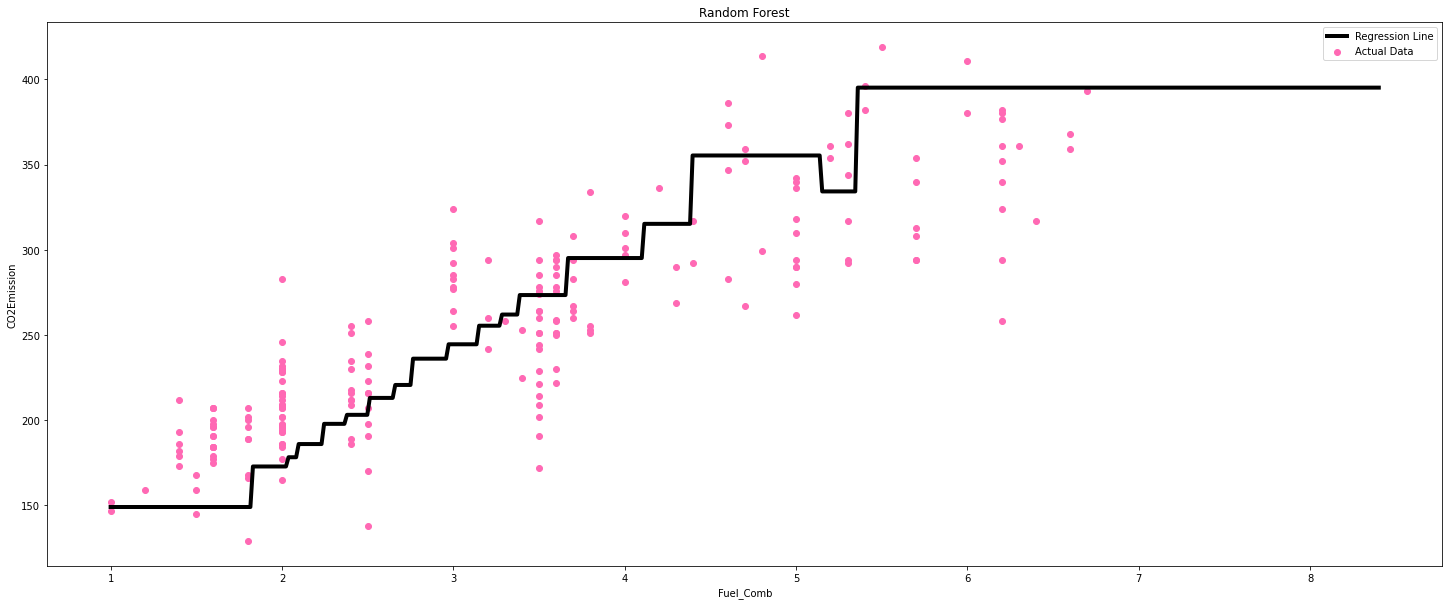

In [40]:
## Tree Analyssis

## Split data into training and test set

fig, axis = plt.subplots(1,1, figsize=(25,10))


## Test Prediction
ypred = rgrid.predict(xtest)
## Evaluation

print("MSE: ", mean_squared_error(ypred, ytest))
print("R2 Score: ", r2_score(ypred, ytest))

## Visualize
## Regression Analyssis
line0 = np.linspace(1, 8.4, 500).reshape(-1, 1)
line1 = np.linspace(4.7, 26, 500).reshape(-1, 1)

line = pd.DataFrame(
    {
        "EngineSize": line0[:, 0],
        "FuelComb": line1[:, 0]
    }
)


axis.scatter(xtest[["ENGINESIZE"]], ytest, label="Actual Data", c="hotpink")
axis.plot(line[['EngineSize']], rgrid.predict(line),
          label="Regression Line", c="black", linewidth=4)
axis.legend()
axis.set_title("Random Forest")
axis.set_xlabel("Fuel_Comb")
axis.set_ylabel("CO2Emission")
plt.show()

In [41]:
forest.get_params().keys()


dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

MSE:  252.3492673156856
R2 Score:  0.9352883542187549


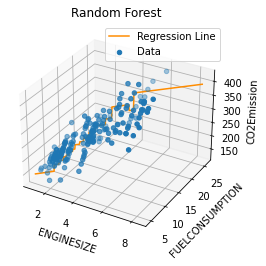

In [42]:
## Tree Analyssis

## Split data into training and test set




## Test Prediction
ypred = rgrid.predict(xtest)
## Evaluation

print("MSE: ", mean_squared_error(ypred, ytest))
print("R2 Score: ", r2_score(ypred, ytest))

## Visualize
## Regression Analyssis
line0 = np.linspace(1, 8.4, 500).reshape(-1, 1)
line1 = np.linspace(4.7, 26, 500).reshape(-1, 1)

line = pd.DataFrame(
    {
        "EngineSize": line0[:, 0],
        "FuelComb": line1[:, 0]
    }
)

fig = plt.figure()
axes = plt.axes(projection='3d')
axes.scatter3D(
    xtest[['ENGINESIZE']], xtest[['FUELCONSUMPTION_COMB']], ytest, label='Data'
)
axes.plot3D(
    line[['EngineSize']].values.ravel(), line[['FuelComb']].values.ravel(), rgrid.predict(line), color='darkorange', label='Regression Line'
)
axes.legend()
axes.set_title("Random Forest")
axes.set_xlabel("ENGINESIZE")
axes.set_ylabel('FUELCONSUMPTION')
axes.set_zlabel("CO2Emission")
plt.show()

In [43]:
line[['EngineSize']].values.ravel()

array([1.        , 1.01482966, 1.02965932, 1.04448898, 1.05931864,
       1.0741483 , 1.08897796, 1.10380762, 1.11863727, 1.13346693,
       1.14829659, 1.16312625, 1.17795591, 1.19278557, 1.20761523,
       1.22244489, 1.23727455, 1.25210421, 1.26693387, 1.28176353,
       1.29659319, 1.31142285, 1.32625251, 1.34108216, 1.35591182,
       1.37074148, 1.38557114, 1.4004008 , 1.41523046, 1.43006012,
       1.44488978, 1.45971944, 1.4745491 , 1.48937876, 1.50420842,
       1.51903808, 1.53386774, 1.54869739, 1.56352705, 1.57835671,
       1.59318637, 1.60801603, 1.62284569, 1.63767535, 1.65250501,
       1.66733467, 1.68216433, 1.69699399, 1.71182365, 1.72665331,
       1.74148297, 1.75631263, 1.77114228, 1.78597194, 1.8008016 ,
       1.81563126, 1.83046092, 1.84529058, 1.86012024, 1.8749499 ,
       1.88977956, 1.90460922, 1.91943888, 1.93426854, 1.9490982 ,
       1.96392786, 1.97875752, 1.99358717, 2.00841683, 2.02324649,
       2.03807615, 2.05290581, 2.06773547, 2.08256513, 2.09739